In [61]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the Digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = models.Sequential()
# print(X_train_scaled.shape[1]) //64``
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Adding an additional hidden layer
model.add(layers.Dense(128, activation='relu'))

# Adding an additional hidden layer
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dropout(0.2))

model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Create TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

# Train the model with TensorBoard callback
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[tensorboard_callback])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_acc}')


Epoch 1/10
21/21 [==============================] - 1s 15ms/step - loss: 1.8541 - accuracy: 0.4988 - val_loss: 1.2733 - val_accuracy: 0.7569
Epoch 2/10
21/21 [==============================] - 0s 7ms/step - loss: 0.8943 - accuracy: 0.7958 - val_loss: 0.6209 - val_accuracy: 0.8889
Epoch 3/10
21/21 [==============================] - 0s 8ms/step - loss: 0.4078 - accuracy: 0.8855 - val_loss: 0.4152 - val_accuracy: 0.9028
Epoch 4/10
21/21 [==============================] - 0s 7ms/step - loss: 0.2454 - accuracy: 0.9203 - val_loss: 0.4008 - val_accuracy: 0.9097
Epoch 5/10
21/21 [==============================] - 0s 6ms/step - loss: 0.1693 - accuracy: 0.9559 - val_loss: 0.3567 - val_accuracy: 0.9236
Epoch 6/10
21/21 [==============================] - 0s 6ms/step - loss: 0.1231 - accuracy: 0.9667 - val_loss: 0.3011 - val_accuracy: 0.9167
Epoch 7/10
21/21 [==============================] - 0s 6ms/step - loss: 0.0866 - accuracy: 0.9838 - val_loss: 0.3251 - val_accuracy: 0.9167
Epoch 8/10
21/21 [=

In [62]:
# Jumlah Fitur dan Label
num_features = X.shape[1]
num_labels = len(set(y))
bobot = model.count_params()

print("Total bobot : ", model.count_params())
print("Features : ", num_features)
print("lables : ", num_labels)

Total bobot :  30282
Features :  64
lables :  10


In [63]:
# Save the model in .h5 format
model.save("model_digits.h5")

/home/ripa/.virtualenvs/rich/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [64]:
# How to load saved model .h5
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model("model_digits.h5")

# Predict using the loaded model
predictions = loaded_model.predict(X_test_scaled)


12/12 [==============================] - 0s 2ms/step


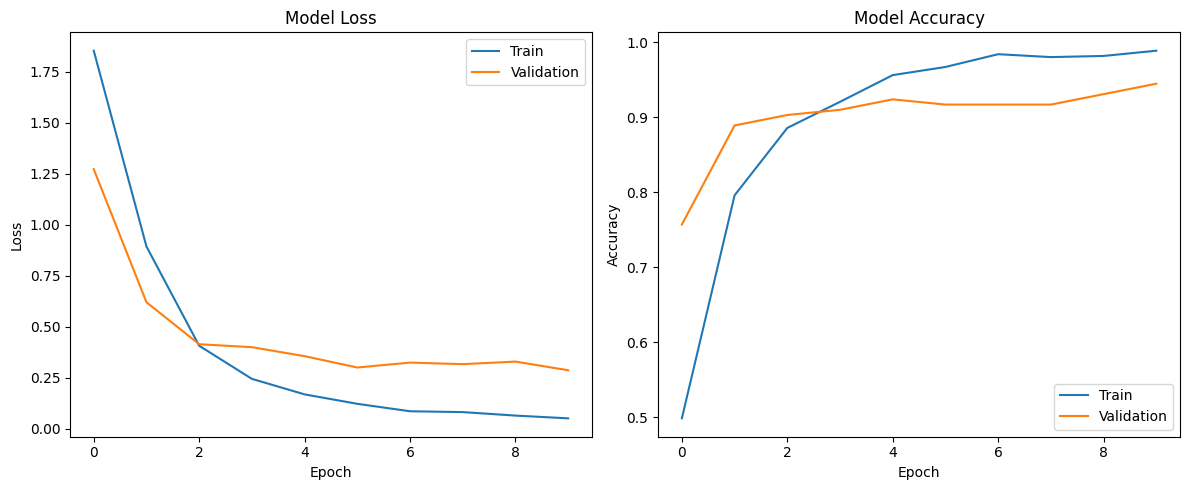

In [66]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()

# Save the plot to a file (e.g., PNG)
plt.savefig('training_plot.png')

In [19]:
# !tensorboard --logdir=logs